# Roteiro Dirigido - Semana 2 - Michel B Fiorio


  1. Qual é a ideia fundamental que define uma máquina de vetor de suporte (SVM)?

  R: a ideia da ferramenta é definir os parâmetros de funções matemáticas de diversos tipos (lineares ou não) que venham a dividir o espaço de caracteristicas separando as amostras de um banco de dados em classes. Ao desenho da função no espaço de características dá-se o nome de hiperplano de suporte. O aprendizado da função baseado nos dados utilizados para treiná-la permite a realização de classificação de novos dados apresentados ao modelo treinado.

  2. O que é um vetor de suporte?

  R: Os vetores de suporte são os planos que estão posicionados sobre as amostras com características mais extremas do banco de dados. A partir dos vetores de suporte é que se define o hiperplano de suporte ótimo do modelo. As distâncias entre os vetores de suporte e o hiperplano de suporte são denominadas de margem. A partir de condições de restrição definidas para os vetores de suporte consegue-se ajustar os parâmetros do hiperplano. O objetivo do algoritmo é encontrar o hiperplano onde as margens entre ele e os vetores de suporte sejam máximas.

  3. Como é apresentado o resultado final de um problema de classificação utilizando SVMs?

  R: A partir do treinamento de um modelo de SVM com um banco de dados, tem-se um algoritmo com capacidade de generalização e pronto para avaliar e classificar dados diferentes dos que foram usados no seu treinamento. De forma visual, podemos utilizar de ferramentas gráficas do python para mostrar graficamente o banco de dados juntamente com o hiperplano criado pelo algoritmo assim como seus vetores de suporte. 

  4. A escala dos dados é relevante no momento de ajustar um modelo de SVM?
  
  R: Sim. Dados que estejam em escalas diferentes causam prejuízo à qualidade do ajuste do modelo, podendo inclusive impedir que ele consiga ser treinado. Portanto, o sugerido é que utilizemos no treinamento de um modelo de SVM apenas dados uniformizados ou normalizados.

Utilizando as bibliotecas que foram comentadas na aula síncrona, faça a análise do dataset  Iris para que seja preparada para o ajuste de modelos de aprendizado de máquina, conforme o roteiro abaixo:
 

 **Questão 1**. Que tipo de problema que o dataset pretende resolver? Quais é a variável do problema que um modelo de aprendizado de máquina pode ter como valor alvo (desejado)?

**Respostas:**

  *Formulação do problema:* classificar as espécies de flores iris através de medições do comprimento e largura das pétalas.

  *Variável alvo:* espécie da planta.

 **Questão 2**. Quantas amostras estão presentes no dataset? Quantos dados estão presentes no dataset? Quais os nomes das variáveis presentes no dataset? Todas as variáveis são quantitativas? Se não, qual variável é qualitativa? Ela é do tipo ordinária ou nominal?
  

**Respostas:**

In [ ]:
#Importando as bibliotecas para análise do problema e configurando o notebook

## OS para executar comandos de diretorio
import os

## NumPy para manipular matrizes e vetores
import numpy as np

## Pandas para manipular os dataframes
import pandas as pd

## Plotar figuras bonitas
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)
import seaborn as sns

In [ ]:
# Importanto bilioteca para carregar o dataset iris

from sklearn import datasets

iris = datasets.load_iris()

In [ ]:
# Importanto biblioteca de ferramentas para manipular classe Bunch

from sklearn.utils import Bunch

Bunch.keys(iris)

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [ ]:
# Número de amostras presentes no dataset:

len(iris['data'])

150

In [ ]:
# Quantos dados estão presentes no dataset:

print( 'Quantidade variáveis independentes: ', len(iris['feature_names']))
print( 'Quantidade variáveis dependentes: ', len(iris['target_names']))

Quantidade variáveis independentes:  4
Quantidade variáveis dependentes:  3


In [ ]:
# Nome das variáveis presentes no dataset:

print(iris['feature_names'], iris['target_names'], sep = '\n')

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
['setosa' 'versicolor' 'virginica']


In [ ]:
# Todas as variáveis são quantitativas? Se não, qual variável é qualitativa? Ela é do tipo ordinária ou nominal?

print(iris["data"][1:5, :] , 'Variáveis independentes quantitativas!', sep='\n')

[[4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]
Variáveis independentes quantitativas!


In [ ]:
print(iris["target"] , 'Variável dependente qualitativa nominal!', sep='\n')

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
Variável dependente qualitativa nominal!


  **Questão 3**. As variáveis quantitativas são contínuas ou discretas? Existe alguma variável com dados faltantes ou inválidos? Se sim, quantos dados estão faltando?
  

**Respostas:**

In [ ]:
print(iris["data"][1:5, :] , 'Variáveis independentes quantitativas CONTÍNUAS!', sep='\n')

[[4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]
Variáveis independentes quantitativas CONTÍNUAS!


Utilizado a função np.isnan() para conferir que não há valores inválidos no banco de dados Iris.

In [ ]:
np.argwhere(np.isnan(iris['data']))

array([], shape=(0, 2), dtype=int64)

In [ ]:
np.argwhere(np.isnan(iris['target']))

array([], shape=(0, 1), dtype=int64)

  **Questão 4**. Como as variáveis do problema se relacionam, em relação à dispersão? Alguma variável se mostra tendenciosa em relação à variável alvo?
  

**Resposta**

In [ ]:
# Calculando correlação Sepal Length x Class(Species)

np.corrcoef(iris['data'][:,0], iris['target'])

array([[1.        , 0.78256123],
       [0.78256123, 1.        ]])

In [ ]:
# Calculando correlação Sepal Width x Class(Species)

np.corrcoef(iris['data'][:,1], iris['target'])

array([[ 1.        , -0.42665756],
       [-0.42665756,  1.        ]])

In [ ]:
# Calculando correlação Petal Length x Class(Species)

np.corrcoef(iris['data'][:,2], iris['target'])

array([[1.       , 0.9490347],
       [0.9490347, 1.       ]])

In [ ]:
# Calculando correlação Petal Width x Class(Species)

np.corrcoef(iris['data'][:,3], iris['target'])

array([[1.        , 0.95654733],
       [0.95654733, 1.        ]])

As variáveis independentes que possuem as maiores correlações (tendência) com a variável alvo são 'petal length' e 'petal width'.

(0.0, 7.0, 0.0, 3.0)

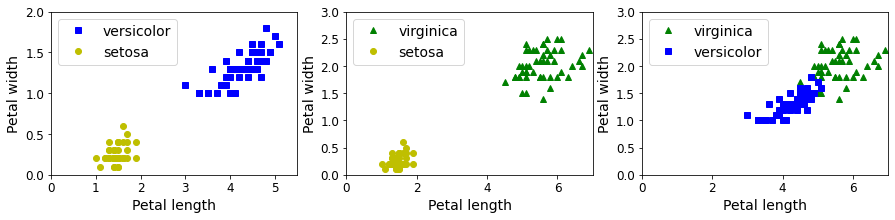

In [ ]:
# Extraindo os dados 'petal length', 'petal width' e 'target'do banco de dados iris

X = iris["data"][:, (2, 3)]  # petal length, petal width
y = iris["target"]

# Separando os dados referentes as classes de espécies setosa e versicolor

setosa_or_versicolor = (y == 0) | (y == 1)
X1 = X[setosa_or_versicolor]
y1 = y[setosa_or_versicolor]

# Separando os dados referentes as classes de espécies setosa e virginica

setosa_or_virginica = (y == 0) | (y == 2)
X2 = X[setosa_or_virginica]
y2 = y[setosa_or_virginica]

# Separando os dados referentes as classes de espécies versicolor e virginica

versicolor_or_virginica = (y == 1) | (y == 2)
X3 = X[versicolor_or_virginica]
y3 = y[versicolor_or_virginica]

# Plotando a dispersão dos dados em um gráfico bidimensional

fig, axes = plt.subplots(ncols=3, figsize=(15,3), sharey=False)

# Plotando a dispersão das classes setosa e versicolor
plt.sca(axes[0])
plt.plot(X1[:,0][y1==1], X1[:,1][y1==1], "bs", label="versicolor")
plt.plot(X1[:,0][y1==0], X1[:,1][y1==0], "yo", label="setosa")
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="upper left", fontsize=14)
plt.axis([0, 5.5, 0, 2])

# Plotando a dispersão das classes setosa e virginica
plt.sca(axes[1])
plt.plot(X2[:,0][y2==2], X2[:,1][y2==2], "g^", label="virginica")
plt.plot(X2[:,0][y2==0], X2[:,1][y2==0], "yo", label="setosa")
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="upper left", fontsize=14)
plt.axis([0, 7, 0, 3])

# Plotando a dispersão das classes versicolor e virginica
plt.sca(axes[2])
plt.plot(X3[:,0][y3==2], X3[:,1][y3==2], "g^", label="virginica")
plt.plot(X3[:,0][y3==1], X3[:,1][y3==1], "bs", label="versicolor")
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="upper left", fontsize=14)
plt.axis([0, 7, 0, 3])


Podemos observar que considerando os parâmetros 'petal length' e 'petal width' do banco de dados, observamos que as classes setosa x versicolor e setosa x virginica são linearmente separáveis, permitindo a aplicação de uma SVM linear. Já as classes versicolor x virginica são não linearmente separáveis.

  **Questão 5**. Ajuste um modelo de SVM de margens rígidas para classificar as amostras linearmente separáveis do problema, considerando as variáveis de entrada "petal length in cm" e "petal width in cm" do banco de dados.  Adicione o ponto [2.5, 1.1] do tipo Iris setosa e explique o que acontece com a margem rígida da SVM.
  

**Resposta**

In [ ]:
# Criando e configurando o classificador linear de margem rígida

from sklearn.svm import SVC

# SVM margem rigida para as classes setosa e versicolor
svm_X1 = SVC(kernel="linear", C=float("inf"))
svm_X1.fit(X1, y1)

# SVM margem rígida para as classes setosa e virginica
svm_X2 = SVC(kernel="linear", C=float("inf"))
svm_X2.fit(X2, y2)

SVC(C=inf, kernel='linear')

In [ ]:
# Criando função para plotar as fronteiras de classificacao (vetor de suporte e hiperplano de suporte)
def plot_svc_decision_boundary(svm_clf, xmin, xmax):
    w = svm_clf.coef_[0]
    b = svm_clf.intercept_[0]

    # Na fronteira de decisao, w0*x0 + w1*x1 + b = 0
    # Hiperplano de decisao => x1 = -w0/w1 * x0 - b/w1
    x0 = np.linspace(xmin, xmax, 200)
    decision_boundary = -w[0]/w[1] * x0 - b/w[1]

    margin = 1/w[1]
    gutter_up = decision_boundary + margin
    gutter_down = decision_boundary - margin

    svs = svm_clf.support_vectors_
    plt.scatter(svs[:, 0], svs[:, 1], s=180, facecolors='#FFAAAA') #identifica os pontos do vetor de suporte
    plt.plot(x0, decision_boundary, "k-", linewidth=2) #hiperplano de suporte
    plt.plot(x0, gutter_up, "k--", linewidth=2) # vetor de suporte +1
    plt.plot(x0, gutter_down, "k--", linewidth=2) # vetor de suporte -1
    plt.annotate('Margin: {}'.format(round(margin,3)),(xmin,xmin)) #exibe o valor da margem de separação

(0.0, 7.0, 0.0, 3.0)

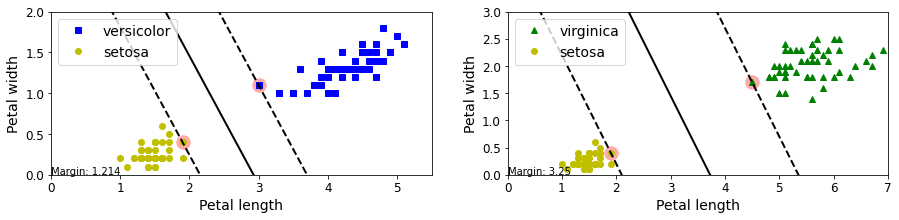

In [ ]:
# Plotando os vetores de suporte e hiperplano para os modelos treinados com os dados originais

fig, axes = plt.subplots(ncols=2, figsize=(15,3), sharey=False)

# Plotando o modelo para setosa e versicolor
plt.sca(axes[0])
plt.plot(X1[:,0][y1==1], X1[:,1][y1==1], "bs", label="versicolor")
plt.plot(X1[:,0][y1==0], X1[:,1][y1==0], "yo", label="setosa")
plot_svc_decision_boundary(svm_X1,0,5.5)
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="upper left", fontsize=14)
plt.axis([0, 5.5, 0, 2])

# Plotando o modelo para setosa e virginica
plt.sca(axes[1])
plt.plot(X2[:,0][y2==2], X2[:,1][y2==2], "g^", label="virginica")
plt.plot(X2[:,0][y2==0], X2[:,1][y2==0], "yo", label="setosa")
plot_svc_decision_boundary(svm_X2,0,7)
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="upper left", fontsize=14)
plt.axis([0, 7, 0, 3])

Nas figuras acima podemos ver a representação dos vetores de suporte e hiperplano para os modelos SVMs dos conjuntos de dados linearmente separáveis.

In [ ]:
# Adicionando um outliner da classe setosa nos bancos de dados filtrados X1 e X2 (que possuem a classe setosa)

X_outlier = np.array([[2.5, 1.1]])
y_outlier = np.array([0])

# setosa e versicolor
X1o = np.concatenate([X1, X_outlier], axis = 0)
y1o = np.concatenate([y1, y_outlier], axis = 0)

# setosa e virginica
X2o = np.concatenate([X2, X_outlier], axis = 0)
y2o = np.concatenate([y2, y_outlier], axis = 0)
 

In [ ]:
# SVM margem rigida para as classes setosa e versicolor com outlier
svm_X1o = SVC(kernel="linear", C=float("inf"))
svm_X1o.fit(X1o, y1o)

# SVM margem rígida para as classes setosa e virginica com outlier
svm_X2o = SVC(kernel="linear", C=float("inf"))
svm_X2o.fit(X2o, y2o)

SVC(C=inf, kernel='linear')

<ipython-input-19-413e4860563a>:9: RuntimeWarning: divide by zero encountered in double_scalars
  decision_boundary = -w[0]/w[1] * x0 - b/w[1]
<ipython-input-19-413e4860563a>:9: RuntimeWarning: invalid value encountered in multiply
  decision_boundary = -w[0]/w[1] * x0 - b/w[1]
<ipython-input-19-413e4860563a>:9: RuntimeWarning: invalid value encountered in subtract
  decision_boundary = -w[0]/w[1] * x0 - b/w[1]
<ipython-input-19-413e4860563a>:11: RuntimeWarning: divide by zero encountered in double_scalars
  margin = 1/w[1]


(0.0, 7.0, 0.0, 3.0)

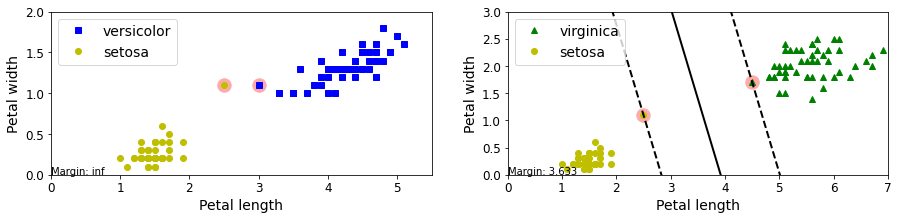

In [ ]:
# Plotando os vetores de suporte e hiperplano para os modelos treinados com os dados com outlier adicionado

fig, axes = plt.subplots(ncols=2, figsize=(15,3), sharey=False)

# Plotando o modelo para setosa e versicolor
plt.sca(axes[0])
plt.plot(X1o[:,0][y1o==1], X1o[:,1][y1o==1], "bs", label="versicolor")
plt.plot(X1o[:,0][y1o==0], X1o[:,1][y1o==0], "yo", label="setosa")
plot_svc_decision_boundary(svm_X1o,0,5.5)
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="upper left", fontsize=14)
plt.axis([0, 5.5, 0, 2])

# Plotando o modelo para setosa e virginica
plt.sca(axes[1])
plt.plot(X2o[:,0][y2o==2], X2o[:,1][y2o==2], "g^", label="virginica")
plt.plot(X2o[:,0][y2o==0], X2o[:,1][y2o==0], "yo", label="setosa")
plot_svc_decision_boundary(svm_X2o,0,7)
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="upper left", fontsize=14)
plt.axis([0, 7, 0, 3])

Conforme vemos nos gráficos acima, ao adicionar um outlier da classe setosa não foi possível desenhar os vetores de suporte e hiperplano ótimo do modelo. Como estamos plotando o hiperplano em relação a x1 na equação do modelo, o hiperplano ótimo sendo uma reta vertical gera uma condição de divisão por zero no cálculo dos pontos do hiperplano a serem desenhados no gráfico.

  **Questão 6**. Para os dados utilizados no Item 5, ajuste um modelo de SVM de margens suaves, com os valores C = 1, 10, 100 e 1000. Comente o que acontece com as margens de cada um dos modelos. Qual se assemelha mais com o modelo de SVM de margens rígidas?
  

**Resposta**

Para essa simulação iremos utilizar os dados das classes de plantas setosa e versicolor com o outlier adicionado anteriormente.

In [ ]:
from sklearn.pipeline import Pipeline 
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC

# Padronizando a escala dos dados
scaler = StandardScaler()


<ipython-input-19-413e4860563a>:9: RuntimeWarning: divide by zero encountered in double_scalars
  decision_boundary = -w[0]/w[1] * x0 - b/w[1]
<ipython-input-19-413e4860563a>:9: RuntimeWarning: invalid value encountered in multiply
  decision_boundary = -w[0]/w[1] * x0 - b/w[1]
<ipython-input-19-413e4860563a>:9: RuntimeWarning: invalid value encountered in subtract
  decision_boundary = -w[0]/w[1] * x0 - b/w[1]
<ipython-input-19-413e4860563a>:11: RuntimeWarning: divide by zero encountered in double_scalars
  margin = 1/w[1]
<ipython-input-19-413e4860563a>:9: RuntimeWarning: divide by zero encountered in double_scalars
  decision_boundary = -w[0]/w[1] * x0 - b/w[1]
<ipython-input-19-413e4860563a>:9: RuntimeWarning: invalid value encountered in multiply
  decision_boundary = -w[0]/w[1] * x0 - b/w[1]
<ipython-input-19-413e4860563a>:9: RuntimeWarning: invalid value encountered in subtract
  decision_boundary = -w[0]/w[1] * x0 - b/w[1]
<ipython-input-19-413e4860563a>:11: RuntimeWarning: div

Text(0.5, 1.0, 'C=1000')

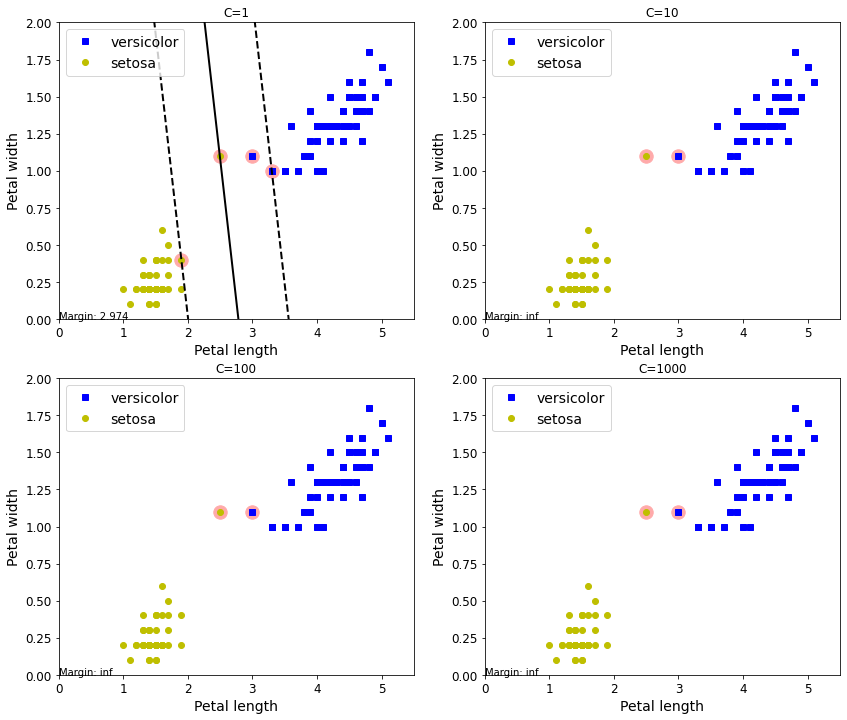

In [ ]:
# SVM margem suave para as classes setosa e versicolor com C=1, 10, 100 e 1000
svm_X1o_C1 = SVC(kernel="linear", C=1)
svm_X1o_C1.fit(X1o, y1o)

svm_X1o_C10 = SVC(kernel="linear", C=10)
svm_X1o_C10.fit(X1o, y1o)

svm_X1o_C100 = SVC(kernel="linear", C=100)
svm_X1o_C100.fit(X1o, y1o)

svm_X1o_C1000 = SVC(kernel="linear", C=1000)
svm_X1o_C1000.fit(X1o, y1o)

# Plotando os vetores de suporte e hiperplano para os modelos treinados com os dados setosa e versicolor e diferentes valores de custo

fig, axes = plt.subplots(nrows = 2, ncols=2, figsize=(14,12), sharey=False, sharex=False)

# Plotando o modelo com C=1
plt.sca(axes[0,0])
plt.plot(X1o[:,0][y1o==1], X1o[:,1][y1o==1], "bs", label="versicolor")
plt.plot(X1o[:,0][y1o==0], X1o[:,1][y1o==0], "yo", label="setosa")
plot_svc_decision_boundary(svm_X1o_C1,0,5.5)
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="upper left", fontsize=14)
plt.axis([0, 5.5, 0, 2])
plt.title('C=1')

# Plotando o modelo com C=10
plt.sca(axes[0,1])
plt.plot(X1o[:,0][y1o==1], X1o[:,1][y1o==1], "bs", label="versicolor")
plt.plot(X1o[:,0][y1o==0], X1o[:,1][y1o==0], "yo", label="setosa")
plot_svc_decision_boundary(svm_X1o_C10,0,5.5)
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="upper left", fontsize=14)
plt.axis([0, 5.5, 0, 2])
plt.title('C=10')

# Plotando o modelo com C=100
plt.sca(axes[1,0])
plt.plot(X1o[:,0][y1o==1], X1o[:,1][y1o==1], "bs", label="versicolor")
plt.plot(X1o[:,0][y1o==0], X1o[:,1][y1o==0], "yo", label="setosa")
plot_svc_decision_boundary(svm_X1o_C100,0,5.5)
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="upper left", fontsize=14)
plt.axis([0, 5.5, 0, 2])
plt.title('C=100')

# Plotando o modelo com C=1000
plt.sca(axes[1,1])
plt.plot(X1o[:,0][y1o==1], X1o[:,1][y1o==1], "bs", label="versicolor")
plt.plot(X1o[:,0][y1o==0], X1o[:,1][y1o==0], "yo", label="setosa")
plot_svc_decision_boundary(svm_X1o_C1000,0,5.5)
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="upper left", fontsize=14)
plt.axis([0, 5.5, 0, 2])
plt.title('C=1000')

Utilizando o modelo SVM de margem suave observamos que agora foi possível plotar o hiperplano para o modelo com custo C=1. Para os modelos com custo C=10, C=100 e C=1000 ocorreu o mesmo resultado que o modelo de margem rígida. Portanto, isso confirma a teoria de que quanto maior o valor do custo menor será a margem permitida pelos vetores de suporte e, então, mais o modelo de margem suave se aproxima do modelo de margem rígida. 

  **Questão7**. Ajuste modelos de SVMs não lineares com funções Kernel Polinomial e Gaussiana para os dados do Item 5. Explique o que acontece com o hiperplano de separação para cada uma das funções Kernel utilizadas.
  

**Resposta**

Para essa simulação iremos utilizar os dados das classes de plantas setosa e versicolor com o outlier adicionado anteriormente.

In [57]:
# Definindo função para plotagem das predições do modelo

def plot_predictions(clf, axes):
    x0s = np.linspace(axes[0], axes[1], 100)
    x1s = np.linspace(axes[2], axes[3], 100)
    x0, x1 = np.meshgrid(x0s, x1s)
    X = np.c_[x0.ravel(), x1.ravel()]
    y_pred = clf.predict(X).reshape(x0.shape)
    y_decision = clf.decision_function(X).reshape(x0.shape)
    plt.contourf(x0, x1, y_pred, cmap=plt.cm.brg, alpha=0.2)
    plt.contourf(x0, x1, y_decision, cmap=plt.cm.brg, alpha=0.1)


# Ajuste do modelo com função Kernel Polinomial
poly_kernel_svm = Pipeline([
            ("scaler", StandardScaler()),
            ("svm_clf", SVC(kernel="poly", gamma='auto', C=1.0))
        ])

rbf_kernel_svm = Pipeline([
            ("scaler", StandardScaler()),
            ("svm_clf", SVC(kernel="rbf", gamma='auto', C=1.0))
        ])

poly_kernel_svm.fit(X1o, y1o)
rbf_kernel_svm.fit(X1o, y1o)

Pipeline(steps=[('scaler', StandardScaler()), ('svm_clf', SVC(gamma='auto'))])

Text(0.5, 1.0, 'γ = auto, C = 1')

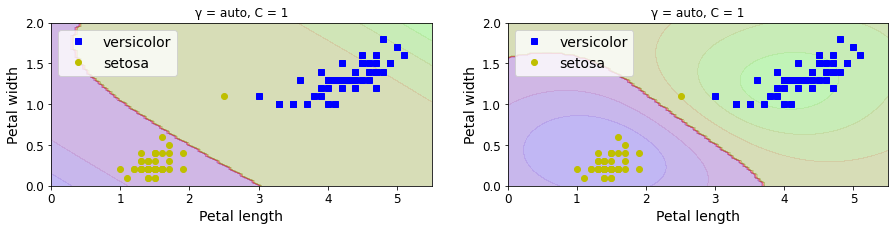

In [58]:
# Plotando os modelos treinados com os dados setosa e versicolor usando kernel Polinomial e Gaussiana, com gamma em automático e C=1.

fig, axes = plt.subplots(ncols=2, figsize=(15,3), sharey=False)

# Kernel Polinomial
plt.sca(axes[0])
plt.plot(X1o[:,0][y1o==1], X1o[:,1][y1o==1], "bs", label="versicolor")
plt.plot(X1o[:,0][y1o==0], X1o[:,1][y1o==0], "yo", label="setosa")
plot_predictions(poly_kernel_svm, [0, 5.5, 0, 2])
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="upper left", fontsize=14)
plt.title('γ = auto, C = 1')

# Kernel Gaussiana
plt.sca(axes[1])
plt.plot(X1o[:,0][y1o==1], X1o[:,1][y1o==1], "bs", label="versicolor")
plt.plot(X1o[:,0][y1o==0], X1o[:,1][y1o==0], "yo", label="setosa")
plot_predictions(rbf_kernel_svm, [0, 5.5, 0, 2])
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="upper left", fontsize=14)
plt.title('γ = auto, C = 1')

Ao se utilizar as funções kernel polinomial e gaussiana nas SVMs observamos uma classificação satisfatória dos dados. Para os parâmetros ajustados, apenas o dado outlier da setosa aparece como classificação errada nos dois modelos. O formato do hiperplano de separação acompanhou as funções polinominal e gaussiana nos dois casos, conforme esperado.

  **Questão 8**. Ajuste um modelo de SVM não linear com função Kernel Gaussiana para os valores de gamma = 0.1, 1 e 10, e valores de C = 1, 10, 100 e 1000. O que acontece ao aumentar o valor de cada parâmetro da função gaussiana? Como estes aumentos afetam a classificação de amostras do problema?

**Resposta**

Para essa simulação iremos utilizar os dados das classes de plantas que não são linearmente separáveis, classes virginica e versicolor.

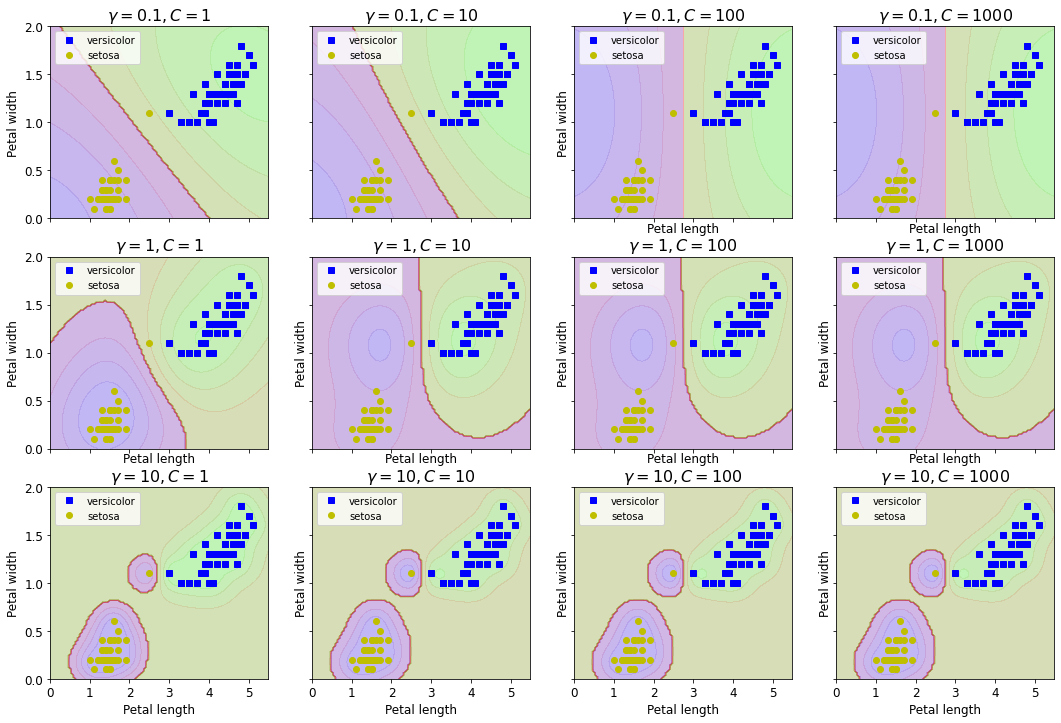

In [ ]:
gamma1, gamma2, gamma3 = 0.1, 1, 10
C1, C2, C3, C4 = 1, 10, 100, 1000
hyperparams = (gamma1, C1), (gamma1, C2), (gamma1, C3), (gamma1, C4), (gamma2, C1), (gamma2, C2), (gamma2, C3), (gamma2, C4), (gamma3, C1), (gamma3, C2), (gamma3, C3), (gamma3, C4)

svm_clfs = []
for gamma, C in hyperparams:
    rbf_kernel_svm_clf = Pipeline([
            ("scaler", StandardScaler()),
            ("svm_clf", SVC(kernel="rbf", gamma=gamma, C=C))
        ])
    rbf_kernel_svm_clf.fit(X1o, y1o)
    svm_clfs.append(rbf_kernel_svm_clf)

fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(18, 12), sharex=True, sharey=True)

for i, svm_clf in enumerate(svm_clfs):
    plt.sca(axes[i // 4, i % 4])
    plt.plot(X1o[:,0][y1o==1], X1o[:,1][y1o==1], "bs", label="versicolor")
    plt.plot(X1o[:,0][y1o==0], X1o[:,1][y1o==0], "yo", label="setosa")
    plot_predictions(svm_clf, [0, 5.5, 0, 2])
    gamma, C = hyperparams[i]
    plt.xlabel("Petal length", fontsize=12)
    plt.ylabel("Petal width", fontsize=12)
    plt.legend(loc="upper left", fontsize=10)
    plt.title(r"$\gamma = {}, C = {}$".format(gamma, C), fontsize=16)
    if i in (0, 1):
        plt.xlabel("")
    if i in (1, 3):
        plt.ylabel("") 
        
plt.show()

Ao realizarmos essas simulações pudemos perceber que o aumento da constante custo issoladamente causa uma diminuição da aceitação de que o modelo possa contenha erros de classificação.
Quando se aumenta o gamma isoladamente o que percebemos é um aumento do formato circular do modelo, dando mais flexibilidade para que as curvas de separação do hiperplano consigam ir 'buscar' dados que possam ter sido classificados errados com gammas pequenos.
Portanto, analisando a combinação de valores elevados de gamma e custo, vemos que o modelo se torna super ajustado aos dados.